# Similarities Between Space-time Number Series and C*-Algebras

The purpose of this notebook is to show that a space-time number (aka quaternion) series similar to a C* algebra. I feel it necessary to add "similar" because to fully characterize the space-time number manifold, one conjugate is not enough. First noticed by Gauss, not only is there the standard conjugate, but the first and second conjugates, defined on the manifold $\mathbb{R}^4$ like so:

$$(t, x, y, z)^* = (t, -x, -y, -z)$$

$$(t, x, y, z)^{*1} \equiv (i q i)^* = (-t, x, -y, -z)$$

$$(t, x, y, z)^{*1} \equiv (j q j)^* = (-t, -x, y, -z)$$

There is a third conjugate, but combining these three with a minus sign can also generate the third conjugate. This notebook should demonstrate that all three conjugates have the expected properties.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

Let's keep things relatively simple and work with just two states.

In [2]:
# Symbolic manipulation
t, x, y, z = sp.symbols("t x y z")
a, b, c, d = sp.symbols("a b c d")
q_txyz = Q([t, x, y, z])
q_abcd = Q([a, b, c, d])
qs_txyz_abcd = Qs([q_txyz, q_abcd])
qs_txyz_abcd.print_state("series txyz abcd")

series txyz abcd
n=1: (t, x, y, z) 
n=2: (a, b, c, d) 
ket: 2/1



There are four properties one must show according to the [wiki page on the topic](https://www.wikiwand.com/en/C*-algebra).

![involution](images/involution.png)

I choose to try and make the notation more explicit. A space-time number series can be a "ket", where the number of columns is 1, or a bra, where the number of rows is equal to 1, a scalar (rows=columns=1), or an operator. I prefer a notation that makes a space-time number series _look different_ from a space-time number. I thus change the style (but not the content) of this to:

$|x^{**}>=|x^*>^*=|x>$

The names of functions that work on series have an "s" appended to them.

In [3]:
for i in range(3):
    conjs(conjs(qs_txyz_abcd, conj_type=i), conj_type=i).print_state(f"qs_txyz_abcd*{i} *{i}")

qs_txyz_abcd*0 *0
n=1: (t, x, y, z) 
n=2: (a, b, c, d) 
ket: 2/1

qs_txyz_abcd*1 *1
n=1: (t, x, y, z) 
n=2: (a, b, c, d) 
ket: 2/1

qs_txyz_abcd*2 *2
n=1: (t, x, y, z) 
n=2: (a, b, c, d) 
ket: 2/1



Complex numbers only need to demonstrate the first case, but space-time numbers require these other two. Fortunately the work is identical.

The next case is about addition and multiplication:

![add and multiply conjugates](images/add_and_multiply_conjugates.png)

$|x + y>^* = |x>^* + |y>^*$

$<x|y>^* = <y^* | x>$

In [4]:
s, u, v, w = sp.symbols("s u v w")
m, n, o, p = sp.symbols("m n o p")
q_suvw = Q([s, u, v, w])
q_mnop = Q([m, n, o, p])
qs_y = Qs([q_suvw, q_mnop])

# Loop through the three conjugates
for i in range(3):
    adds_conjs = conjs(adds(qs_txyz_abcd, qs_y), conj_type=i)
    conjs_adds = adds(conjs(qs_txyz_abcd, conj_type=i), conjs(qs_y, conj_type=i))
    print(f"|x + y>*{i} = |x*{i}> + |y*{i}>?: {equals(adds_conjs, conjs_adds)}")

|x + y>*0 = |x*0> + |y*0>?: True
|x + y>*1 = |x*1> + |y*1>?: True
|x + y>*2 = |x*2> + |y*2>?: True


In [5]:
for i in range(3):
    products_conjs = conjs(products(qs_txyz_abcd.bra(), qs_y), conj_type=i)
    conjs_products = products(conjs(qs_y.bra(), conj_type=i), conjs(qs_txyz_abcd, conj_type=i))
    print(f"<x|y>*{i} = <y*{i}|x*{i}>?: {equals(adds_conjs, conjs_adds)}")

<x|y>*0 = <y*0|x*0>?: True
<x|y>*1 = <y*1|x*1>?: True
<x|y>*2 = <y*2|x*2>?: True


Adding is always simple. Too often people presume because space-time numbers don't commute, many properties are lost. Conjugates sprinkle in negative signs in a reasonable way.

Here is the third property:

![complex numbers in A](images/complex_numbers_in_A.png)

I needed to ask about [this issue on math.stackexchange.com](https://math.stackexchange.com/questions/4387586/c-algebra-and-multiplying-by-complex-numbers/4387610#4387610). The $\lambda$ in **C** is specifically not in A.

Humans can be this flexible. My goal in **mathematical physics** it to figure out the one collection of math tools used by the Universe to make the Universe do its thing, the majority of which is being lazy, the only way to last 13.6 billion years.

The way my library is written, there are space-time numbers of the form $(t, x, 0, 0)$ but not a class of complex numbers. One cannot multiply a space-time number series by a space-time number. Instead, one can form a scalar space-time number series - the number of rows equals the number of columns equals one. A scalar series can multiply by any space-time number series. I can show:

$$ |\lambda x)>^* = |x^* \lambda^*>$$

In [6]:
qs_scalar = Qs([q_suvw])

for i in range(3):
    products_conjs = conjs(products(qs_scalar.bra(), qs_txyz_abcd), conj_type=i)
    conjs_products = products(conjs(qs_scalar.bra(), conj_type=i), conjs(qs_txyz_abcd, conj_type=i))
    print(f"Is |λx>*{i} = |x*{i} λ*{i}> ?: {equals(adds_conjs, conjs_adds)}")

Is |λx>*0 = |x*0 λ*0> ?: True
Is |λx>*1 = |x*1 λ*1> ?: True
Is |λx>*2 = |x*2 λ*2> ?: True


The physical reason to not work with complex numbers $(a, b)$ but prefer numbers of the form $(a, b, 0, 0)$ is that other observers may well record the same event as $(a', b', c', d')$. A scalar_q() space-time number is (a, 0, 0, 0) and a scalar_q() space-time number series is $<(a, b, c, d)>)$. I hope that appending the \_q() to the function will clearly denote my usage is different because the space-time number structure is maintained.

So far, no properties have been different. Now it is time to work with norms.

![norms](images/norms.png)

$<<x^*|x>^*|<x^*|x>> = <x^*|x><x^{**}|x^*>$

Each side has 4 $x$'s. If one applies the rules to simplify conjugates, there are two on each side.

The squared norm, $<x^*|x>$, will return a positive scalar space-time number, $(a, 0, 0, 0)\;a \ge 0$. It is expected to work for the conjugate, but the first and second conjugates are worth calculating.

<<x^*0|x>*0|<x|x>> = <x|x><x*0|x*0>? True
<<x^*1|x>*1|<x|x>> = <x|x><x*1|x*1>? False
<<x^*2|x>*2|<x|x>> = <x|x><x*2|x*2>? False
<<𝑥∗2 *|𝑥>∗|<𝑥∗2 *|𝑥>>
n=1


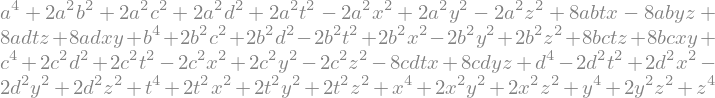


<𝑥∗2 *|𝑥><𝑥*|𝑥∗2>
n=1


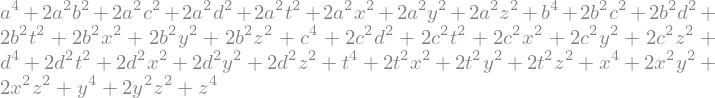

In [7]:
for i in range(3):

    qs_txyz_abcd_bra_c = Qs([conj(q_txyz, conj_type=i), conj(q_abcd, conj_type=i)], qs_type="bra")
    xcx = products(qs_txyz_abcd_bra_c, qs_txyz_abcd)

    norm_product = norm_squareds(xcx)
    product_norm = products(norm_squareds(qs_txyz_abcd), norm_squareds(conjs(qs_txyz_abcd, conj_type=i)))

    print(f"<<x^*{i}|x>*{i}|<x|x>> = <x|x><x*{i}|x*{i}>? {equals(norm_product, product_norm)}") 
    
    if i == 2:
        norm_product.expand().simplify().display("<<𝑥∗2 *|𝑥>∗|<𝑥∗2 *|𝑥>>")
        product_norm.expand().simplify().display("<𝑥∗2 *|𝑥><𝑥*|𝑥∗2>")

The first and second conjugates do not treat space isotrophically. In the calculation, one is working with the standard conjugate and a first or second conjugate. The spatial parts will get mixed up differently as a result. Every term in the second expression can be found in the first, but the reverse is not true. The second expression only has terms with a positive sign while the first one has ten terms that are negative.

Space-time number series are a normed algebra.

## Will the differences matter?

Or better yet, will the differences be of any interest? I know of one application that I have never built out fully. In chapter 3, "Theory of Angular Momentum" of "Modern Quantum Mechanics" by J. J. Sakurai, he shows how to use a pair of infinitesimal rotations to understand rotations. To second order in epsilon, he showed:

$$R_x(\varepsilon) R_y(\varepsilon) - R_y(\varepsilon) R_x(\varepsilon) = R_z(\varepsilon^2) - 1$$

Certainly others have done the same calculation. My observation was that this result would be the same if one takes the conjugate of the infinitesimals:

$$R_x(\varepsilon)^* R_y(\varepsilon)^* - R_y(\varepsilon)^* R_x(\varepsilon)^* = R_z(\varepsilon^2) - 1$$

If one uses the first and second conjugates, there would be an $i^2$ introduced where the two R's form a product.

$$R_x(\varepsilon)^{*1} R_y(\varepsilon)^{*1} - R_y(\varepsilon)^{*1} R_x(\varepsilon)^{*1} = -(R_z(\varepsilon^2) - 1)$$

It is my speculation that one could construct structures with both $2 \pi$ and $4 \pi$ symmetry depending on which conjugates get used. Flexibility would be a good thing since both are seen in Nature. It is easy enough to visualize both symmetries with a bottle of beer. Spin around on a bar stool with the bottle. It takes $2 \pi$ rotations to get back to the starting position. Now take the bottle and twist it in the hand. One rotation is not enough. Do another rotation, and the bottle is back to the starting place in a $4 \pi$ rotation. The difference is that the should creates a constraint in space. When space has to be treated non-isotropically, there is a chance that the $4 \pi$ rotations are required. The first and second conjugates are like that.